# Pandas IO

## Criando os nomes

In [1]:
import pandas as pd # noqa E402

In [2]:
# Se precisar recriar as listas no de nomes, descomente o código abaixo
# e execute.

# nomes = pd.read_csv('../data/nomes.csv')
# nomes.head(10)

# selecao_m = nomes['classification'] == 'M'
# nomes_masculinos = nomes[selecao_m][['first_name']]
# nomes_masculinos.reset_index(drop=True, inplace=True)
# nomes_masculinos.rename(columns={'first_name': 'nome'}, inplace=True)
# nomes_masculinos['nome'] = nomes_masculinos['nome'].str.capitalize()
# nomes_masculinos.to_csv('../data/nomes_m.csv', index=False)

# selecao_f = nomes['classification'] == 'F'
# nomes_femininos = nomes[selecao_f][['first_name']]
# nomes_femininos.reset_index(drop=True, inplace=True)
# nomes_femininos.rename(columns={'first_name': 'nome'}, inplace=True)
# nomes_femininos['nome'] = nomes_femininos['nome'].str.capitalize()
# nomes_femininos.to_csv('../data/nomes_f.csv', index=False)

In [3]:
# nomes_m = pd.read_json(
#     'https://servicodados.ibge.gov.br/api/v1/censos/nomes/'
#     + 'ranking?qtd=200&sexo=m'
# )

# Quando o serviço acima estiver indisponível, use o código abaixo:
nomes_m = pd.read_csv('../data/nomes_m.csv')
nomes_m = nomes_m.sample(200)
nomes_m.reset_index(drop=True, inplace=True)

# nomes_f = pd.read_json(
#     'https://servicodados.ibge.gov.br/api/v1/censos/nomes/'
#     + 'ranking?qtd=200&sexo=f'
# )

# Quando o serviço acima estiver indisponível, use o código abaixo:
nomes_f = pd.read_csv('../data/nomes_f.csv')
nomes_f = nomes_f.sample(200)
nomes_f.reset_index(drop=True, inplace=True)

In [4]:
nomes_m.head(10)

,nome
0,Lobato
1,Azeilton
2,Yurian
3,Valdervan
4,Jeofran
5,Menoli
6,Matusalen
7,Isonildo
8,Georger
9,Josear


In [5]:
nomes_f.head(10)

,nome
0,Iranita
1,Dayze
2,Aldanete
3,Mineli
4,Grasieli
5,Irenilva
6,Sintiane
7,Allynne
8,Rebeka
9,Teodulina


In [6]:
print(f'Quantidade de nomes: {len(nomes_m) + len(nomes_f)}')

Quantidade de nomes: 400


In [7]:
frames = [nomes_m.sample(200), nomes_f.sample(200)]

In [8]:
type(pd.concat(frames)['nome'])

pandas.core.series.Series

In [9]:
nomes = pd.concat(frames)['nome'].to_frame()

In [10]:
nomes

,nome
26,Valmarino
48,Marionilson
167,Fablo
49,Rubismar
146,Olisses
...,...
125,Verineide
81,Iolaia
18,Crizangela
196,Zanda


In [11]:
nomes = nomes.sample(nomes.shape[0])
nomes.reset_index(drop=True, inplace=True)
nomes

,nome
0,Atiene
1,Josila
2,Hendrio
3,Eradio
4,Marinilde
...,...
395,Ziane
396,Viviany
397,Thulio
398,Jeovanil


## incluindo ID dos alunos

In [12]:
import numpy as np # noqa E402
np.random.seed(123)

In [13]:
total_alunos = nomes.shape[0]
total_alunos

400

In [14]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [15]:
nomes.sample(5)

,nome,id_aluno
188,Dilna,369
57,Italuana,303
203,Jildevania,382
382,Rhayan,33
230,Doberto,111


In [16]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [17]:
nomes

,nome,id_aluno,dominio
0,Atiene,235,@dominiodoemail.com.br
1,Josila,43,@servicodoemail.com
2,Hendrio,304,@servicodoemail.com
3,Eradio,156,@dominiodoemail.com.br
4,Marinilde,343,@servicodoemail.com
...,...,...,...
395,Ziane,231,@dominiodoemail.com.br
396,Viviany,99,@servicodoemail.com
397,Thulio,323,@dominiodoemail.com.br
398,Jeovanil,383,@dominiodoemail.com.br


In [18]:
nomes['email'] = nomes['nome'].str.cat(nomes.dominio).str.lower()
nomes

,nome,id_aluno,dominio,email
0,Atiene,235,@dominiodoemail.com.br,atiene@dominiodoemail.com.br
1,Josila,43,@servicodoemail.com,josila@servicodoemail.com
2,Hendrio,304,@servicodoemail.com,hendrio@servicodoemail.com
3,Eradio,156,@dominiodoemail.com.br,eradio@dominiodoemail.com.br
4,Marinilde,343,@servicodoemail.com,marinilde@servicodoemail.com
...,...,...,...,...
395,Ziane,231,@dominiodoemail.com.br,ziane@dominiodoemail.com.br
396,Viviany,99,@servicodoemail.com,viviany@servicodoemail.com
397,Thulio,323,@dominiodoemail.com.br,thulio@dominiodoemail.com.br
398,Jeovanil,383,@dominiodoemail.com.br,jeovanil@dominiodoemail.com.br


In [19]:
type(np.random)

module

## Criando a tabela de Cursos

In [20]:
import html5lib # noqa E402

In [21]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

# se o serviço acima estiver indisponível, use o código abaixo:
# cursos = [pd.read_csv('../data/cursos.csv')]

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [22]:
# O tipo retornado por read_html é um lista de DataFrames
type(cursos)

list

In [23]:
len(cursos)

1

In [24]:
cursos = cursos[0]

In [25]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [26]:
type(cursos)

pandas.core.frame.DataFrame

In [27]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


## Alterando o index de cursos

In [28]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)

In [29]:
cursos.head(5)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [30]:
cursos['id'] = cursos.index + 1

In [31]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [32]:
cursos.set_index('id', inplace=True)

In [33]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


## Matriculando os alunos nos cursos

In [34]:
# nomes['matriculas'] = np.ceil(
#     np.random.exponential(size=total_alunos) * 1.5
# ).astype(int)

nomes['matriculas'] = np.ceil(
    np.random.exponential(size=total_alunos) * 1.5
).astype(int)

In [35]:
nomes.sample(20)

,nome,id_aluno,dominio,email,matriculas
193,Sadraque,146,@dominiodoemail.com.br,sadraque@dominiodoemail.com.br,2
387,Elessandro,97,@dominiodoemail.com.br,elessandro@dominiodoemail.com.br,2
232,Orgelio,322,@dominiodoemail.com.br,orgelio@dominiodoemail.com.br,2
313,Alexandrea,260,@servicodoemail.com,alexandrea@servicodoemail.com,2
199,Clores,35,@dominiodoemail.com.br,clores@dominiodoemail.com.br,1
16,Davisom,191,@servicodoemail.com,davisom@servicodoemail.com,1
231,Edileni,336,@servicodoemail.com,edileni@servicodoemail.com,1
135,Nairene,387,@servicodoemail.com,nairene@servicodoemail.com,3
364,Crecencia,136,@dominiodoemail.com.br,crecencia@dominiodoemail.com.br,1
181,Valdevir,168,@dominiodoemail.com.br,valdevir@dominiodoemail.com.br,2


In [36]:
nomes.matriculas.describe()

count    400.000000
mean       2.120000
std        1.498738
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [37]:
import seaborn as sns # noqa E402

E:\repositorios\alura\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

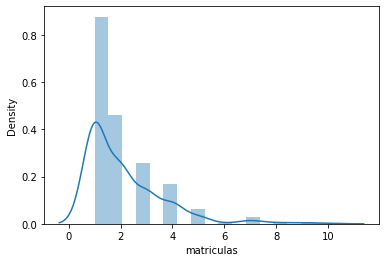

In [38]:
sns.distplot(nomes.matriculas)

In [39]:
nomes.matriculas.value_counts()

1     186
2      98
3      55
4      36
5      13
7       6
8       2
9       2
6       1
10      1
Name: matriculas, dtype: int64

In [40]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,Aleuda,277,@servicodoemail.com,aleuda@servicodoemail.com,2
264,Adelfino,290,@dominiodoemail.com.br,adelfino@dominiodoemail.com.br,4
213,Justavo,195,@servicodoemail.com,justavo@servicodoemail.com,3
298,Menoli,134,@dominiodoemail.com.br,menoli@dominiodoemail.com.br,7
33,Dulcinia,192,@dominiodoemail.com.br,dulcinia@dominiodoemail.com.br,1


## Selecionando cursos

In [41]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
223,Guenther,321,@dominiodoemail.com.br,guenther@dominiodoemail.com.br,3
169,Maucilene,394,@dominiodoemail.com.br,maucilene@dominiodoemail.com.br,2
348,Leonaro,332,@dominiodoemail.com.br,leonaro@dominiodoemail.com.br,1


In [42]:
todas_matriculas = []
x = np.random.rand(20)
x

array([0.05751192, 0.13358039, 0.24285535, 0.25264449, 0.19218292,
       0.70825561, 0.6694799 , 0.61311796, 0.48222108, 0.25268323,
       0.19443853, 0.44236406, 0.9780213 , 0.87160349, 0.6274891 ,
       0.69694288, 0.13029884, 0.97271443, 0.11347265, 0.15979268])

In [43]:
prob = x / sum(x)
prob

array([0.00654164, 0.01519397, 0.02762334, 0.0287368 , 0.02185966,
       0.08055984, 0.07614934, 0.0697385 , 0.05484976, 0.02874121,
       0.02211622, 0.05031627, 0.11124408, 0.09913969, 0.07137313,
       0.07927309, 0.01482071, 0.11064045, 0.01290684, 0.01817546])

In [44]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p=prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])


In [45]:
matriculas.head(10)

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,43,18
4,43,17
5,43,15
6,304,16
7,156,13
8,156,6
9,156,13


In [46]:
nomes[nomes['id_aluno'] == 156]

,nome,id_aluno,dominio,email,matriculas
3,Eradio,156,@dominiodoemail.com.br,eradio@dominiodoemail.com.br,5


In [47]:
matriculas_por_curso = (
    matriculas.groupby('id_curso')
    .count()
    .join(cursos['nome_do_curso'])
    .rename(columns={'id_aluno': 'quantidade_de_alunos'})
    .sort_values('id_curso', ascending=True)
)
matriculas_por_curso = matriculas_por_curso[
    ['nome_do_curso', 'quantidade_de_alunos']
]
matriculas_por_curso

,nome_do_curso,quantidade_de_alunos
id_curso,,
1,Lógica de programação,3
2,Java para Web,8
3,C# para Web,22
4,Ruby on Rails,23
5,Cursos de Python,21
6,PHP com MySql,67
7,.NET para web,64
8,Novas integrações com Java,56
9,TDD com Java,49


In [48]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
363,Thawne,362,@servicodoemail.com,thawne@servicodoemail.com,1
82,Madio,7,@dominiodoemail.com.br,madio@dominiodoemail.com.br,3
146,Elissandra,352,@servicodoemail.com,elissandra@servicodoemail.com,1


In [49]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [50]:
matriculas.sample(5)

,id_aluno,id_curso
42,200,11
96,241,13
139,278,5
299,36,7
239,31,5


In [51]:
matriculas_por_curso.sample(5)

,nome_do_curso,quantidade_de_alunos
id_curso,,
17,Internet das coisas,9
15,Análise de dados,63
4,Ruby on Rails,23
14,Desenvolvendo jogos,80
7,.NET para web,64


## Saída em diferentes formatos

In [52]:
matriculas_por_curso.head(3)

,nome_do_curso,quantidade_de_alunos
id_curso,,
1,Lógica de programação,3
2,Java para Web,8
3,C# para Web,22


In [53]:
matriculas_por_curso.to_csv('../data/matriculas_por_curso.csv', index=False)

In [54]:
pd.read_csv('../data/matriculas_por_curso.csv')

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,3
1,Java para Web,8
2,C# para Web,22
3,Ruby on Rails,23
4,Cursos de Python,21
5,PHP com MySql,67
6,.NET para web,64
7,Novas integrações com Java,56
8,TDD com Java,49
9,Código limpo com C#,26


In [55]:
matriculas_json = matriculas_por_curso.to_json()

In [56]:
print(matriculas_json)

{"nome_do_curso":{"1":"L\u00f3gica de programa\u00e7\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\u00e7\u00f5es com Java","9":"TDD com Java","10":"C\u00f3digo limpo com C#","11":"Preparat\u00f3rio para certifica\u00e7\u00e3o Java","12":"Hardware b\u00e1sico","13":"Persist\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\u00e1lise de dados","16":"Estat\u00edstica b\u00e1sica","17":"Internet das coisas","18":"Programa\u00e7\u00e3o funcional","19":"Boas pr\u00e1ticas em Java","20":"Orienta\u00e7\u00e3o objetos com Java"},"quantidade_de_alunos":{"1":3,"2":8,"3":22,"4":23,"5":21,"6":67,"7":64,"8":56,"9":49,"10":26,"11":18,"12":49,"13":91,"14":80,"15":63,"16":68,"17":9,"18":93,"19":14,"20":24}}


In [57]:
matricula_html = matriculas_por_curso.to_html()

In [58]:
print(matricula_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>nome_do_curso</th>
      <th>quantidade_de_alunos</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>Lógica de programação</td>
      <td>3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Java para Web</td>
      <td>8</td>
    </tr>
    <tr>
      <th>3</th>
      <td>C# para Web</td>
      <td>22</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Ruby on Rails</td>
      <td>23</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Cursos de Python</td>
      <td>21</td>
    </tr>
    <tr>
      <th>6</th>
      <td>PHP com MySql</td>
      <td>67</td>
    </tr>
    <tr>
      <th>7</th>
      <td>.NET para web</td>
      <td>64</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Novas integrações com Java</td>
      <td>56</td>
    </tr>
    <tr>
      <th>9</th>
      <td>TDD com Ja

## Criando o banco de dados

In [59]:
from sqlalchemy import create_engine, MetaData, Table, inspect # noqa E402

In [60]:
engine = create_engine('sqlite:///:memory:')

In [61]:
engine

Engine(sqlite:///:memory:)

In [62]:
type(engine)

sqlalchemy.engine.base.Engine

In [63]:
matriculas_por_curso.to_sql('matriculas', engine)

In [64]:
inspector = inspect(engine)  # criando um Inspector object
print(inspector.get_table_names())  # Exibindo as tabelas com o inspector

['matriculas']


## Buscando do banco SQL

In [65]:
query = 'SELECT * FROM matriculas where quantidade_de_alunos < 20'

In [66]:
pd.read_sql(query, engine)

,id_curso,nome_do_curso,quantidade_de_alunos
0,1,Lógica de programação,3
1,2,Java para Web,8
2,11,Preparatório para certificação Java,18
3,17,Internet das coisas,9
4,19,Boas práticas em Java,14


In [67]:
muitas_matriculas = pd.read_sql_table(
    'matriculas',
    engine,
    columns=['nome_do_curso', 'quantidade_de_alunos']
)

In [68]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [69]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
12,Persistência com .NET,91
13,Desenvolvendo jogos,80
17,Programação funcional,93


In [70]:
matriculas_por_curso.query('quantidade_de_alunos > 70')

,nome_do_curso,quantidade_de_alunos
id_curso,,
13,Persistência com .NET,91
14,Desenvolvendo jogos,80
18,Programação funcional,93


## Escrevendo no banco

In [71]:
muitas_matriculas.to_sql('muitas_matriculas', engine)

In [72]:
inspector = inspect(engine)  # criando um Inspector object
print(inspector.get_table_names())  # Exibindo as tabelas com o inspector

['matriculas', 'muitas_matriculas']


## Nomes dos alunos e alunas da próxima turma

In [73]:
matriculas_por_curso.sample(5)

,nome_do_curso,quantidade_de_alunos
id_curso,,
13,Persistência com .NET,91
8,Novas integrações com Java,56
14,Desenvolvendo jogos,80
5,Cursos de Python,21
3,C# para Web,22


In [74]:
id_curso = 3

In [75]:
proxima_turma = matriculas.query(f"id_curso == {id_curso}")
proxima_turma

,id_aluno,id_curso
138,396,3
172,253,3
236,56,3
238,31,3
256,380,3
276,30,3
395,168,3
410,229,3
433,331,3
466,125,3


In [76]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
4,3,Ellio,@servicodoemail.com,ellio@servicodoemail.com,2
30,3,Sirlena,@dominiodoemail.com.br,sirlena@dominiodoemail.com.br,4
31,3,Valnilde,@servicodoemail.com,valnilde@servicodoemail.com,3
56,3,Verineide,@dominiodoemail.com.br,verineide@dominiodoemail.com.br,1
65,3,Macline,@dominiodoemail.com.br,macline@dominiodoemail.com.br,3
71,3,Uadir,@dominiodoemail.com.br,uadir@dominiodoemail.com.br,2
78,3,Licir,@dominiodoemail.com.br,licir@dominiodoemail.com.br,1
93,3,Etanael,@servicodoemail.com,etanael@servicodoemail.com,3
125,3,Agueda,@dominiodoemail.com.br,agueda@dominiodoemail.com.br,3


In [77]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
4            Ellio
30         Sirlena
31        Valnilde
56       Verineide
65         Macline
71           Uadir
78           Licir
93         Etanael
125         Agueda
150       Marjurie
168       Valdevir
175         Neuman
199       Jacelina
199       Jacelina
229         Lobato
248         Iadson
253        Estevao
269      Esmerindo
291           Liia
331    Franthiesco
380        Irandir
396          Heric
Name: nome, dtype: object

In [78]:
proxima_turma.set_index('id_aluno').join(
    nomes.set_index('id_aluno')
    )['nome'].to_frame()


,nome
id_aluno,
4,Ellio
30,Sirlena
31,Valnilde
56,Verineide
65,Macline
71,Uadir
78,Licir
93,Etanael
125,Agueda


In [79]:
nome_curso = cursos.loc[id_curso, 'nome_do_curso']
nome_curso


'C# para Web'

In [80]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    C# para Web
Name: 3, dtype: object

In [81]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'C# para Web'

In [82]:
proxima_turma = proxima_turma.set_index('id_aluno').join(
    nomes.set_index('id_aluno')
    )['nome'].to_frame()
proxima_turma

,nome
id_aluno,
4,Ellio
30,Sirlena
31,Valnilde
56,Verineide
65,Macline
71,Uadir
78,Licir
93,Etanael
125,Agueda


In [83]:
proxima_turma.rename(
    columns={'nome': f'Alunos do Curso de {nome_curso}'}, inplace=True
)
proxima_turma

,Alunos do Curso de C# para Web
id_aluno,
4,Ellio
30,Sirlena
31,Valnilde
56,Verineide
65,Macline
71,Uadir
78,Licir
93,Etanael
125,Agueda


In [84]:
proxima_turma

,Alunos do Curso de C# para Web
id_aluno,
4,Ellio
30,Sirlena
31,Valnilde
56,Verineide
65,Macline
71,Uadir
78,Licir
93,Etanael
125,Agueda


## Excel

In [85]:
proxima_turma.to_excel('../data/proxima_turma.xlsx', index=False)

In [86]:
pd.read_excel('../data/proxima_turma.xlsx')

,Alunos do Curso de C# para Web
0,Ellio
1,Sirlena
2,Valnilde
3,Verineide
4,Macline
5,Uadir
6,Licir
7,Etanael
8,Agueda
9,Marjurie
